## Visualisasi Data - Iris Dataset

In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np

# lib visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# lib preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [2]:
# load dataset
dataset = pd.read_csv("../dataset/dataset_iris.csv")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [3]:
def boxplot(dataset):

  # define boxplot
  fig, ax = plt.subplots(figsize=(8,4))
  ax.boxplot(
    x=dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]],
    labels=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    patch_artist=True, widths=(0.75, 0.75, 0.75, 0.75)
  )

  # set labels
  ax.set_title("", fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.grid(True)

  # show boxplot
  plt.tight_layout()
  plt.show()

In [4]:
def heatmap(dataset):
  # create heatmap corr
  fig, ax = plt.subplots(figsize=(8,4))
  sns.heatmap(
    dataset.corr(numeric_only=True), vmin=-1, vmax=1,
    cmap="viridis", annot=True, fmt=".3f", linewidths=1
  )

  # set labels
  ax.set_title("", fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.grid(False)

  # show heatmap
  plt.tight_layout()
  plt.show()

In [5]:
# function scatter plot
def scatter(data, x, y):
  
  # create scatter plots
  fig, ax = plt.subplots(figsize = (8,4))
  sns.scatterplot(data=data, x=x, y=y, hue="species")
  
  # set labels
  ax.set_title("", fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.legend(loc='upper left')
  ax.grid(True)
  
  # show scatterplot
  plt.tight_layout()
  plt.show()

In [6]:
# Set features and Labels
x = dataset[["sepal_length","sepal_width","petal_length","petal_width"]].values
y = dataset["species"].values

### MinMax Scaler

In [7]:
# process minmax scaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(x)

In [8]:
# results minmax scaler
MinMax = pd.concat([
  pd.DataFrame(scaled, columns=["sepal_length","sepal_width","petal_length","petal_width"]),
  pd.DataFrame(y, columns=["species"])
],axis=1)

In [9]:
# results minmax scaler
print(MinMax)

     sepal_length  sepal_width  petal_length  petal_width    species
0        0.222222     0.625000      0.067797     0.041667     setosa
1        0.166667     0.416667      0.067797     0.041667     setosa
2        0.111111     0.500000      0.050847     0.041667     setosa
3        0.083333     0.458333      0.084746     0.041667     setosa
4        0.194444     0.666667      0.067797     0.041667     setosa
..            ...          ...           ...          ...        ...
145      0.666667     0.416667      0.711864     0.916667  virginica
146      0.555556     0.208333      0.677966     0.750000  virginica
147      0.611111     0.416667      0.711864     0.791667  virginica
148      0.527778     0.583333      0.745763     0.916667  virginica
149      0.444444     0.416667      0.694915     0.708333  virginica

[150 rows x 5 columns]


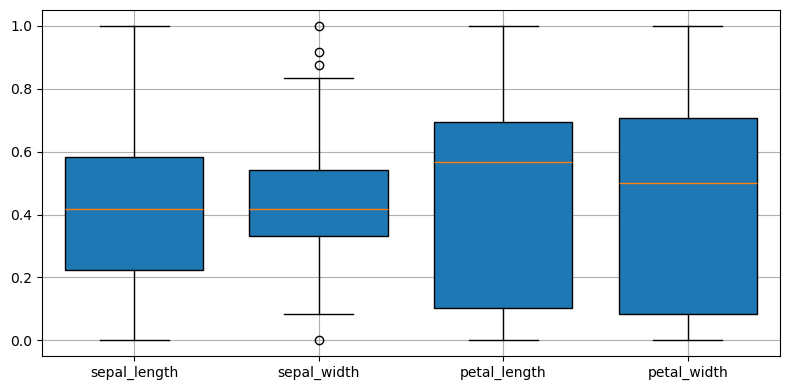

In [10]:
# results minmax with boxplot
boxplot(MinMax)

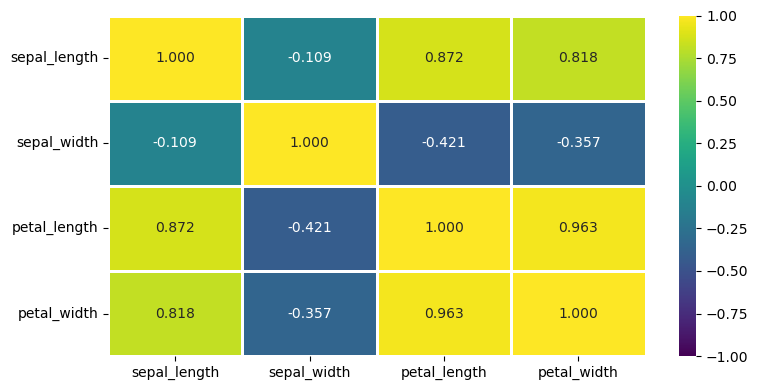

In [11]:
# results minmax with heatmap
heatmap(MinMax)

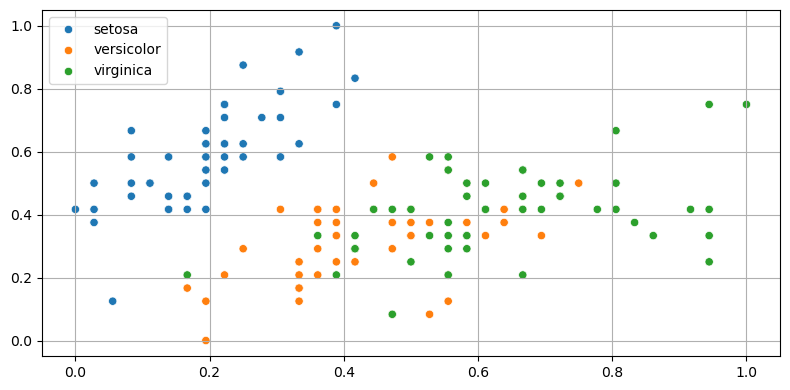

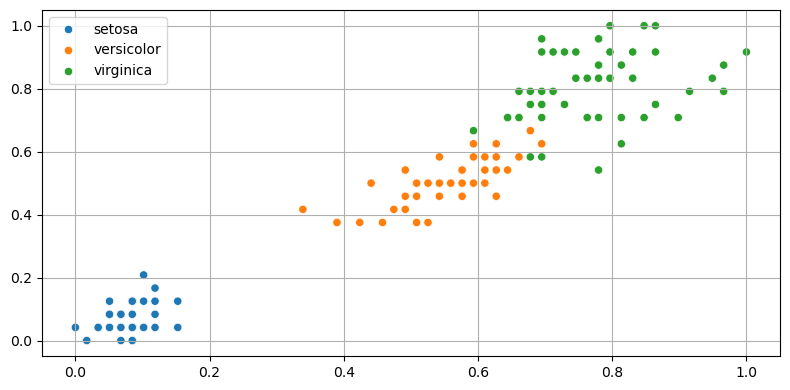

In [12]:
# results minmax with scatterplot
scatter(MinMax, "sepal_length", "sepal_width")
scatter(MinMax, "petal_length", "petal_width")

### Standard Scaler

In [13]:
# process standard scaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

In [14]:
# results standard scaler
standard = pd.concat([
  pd.DataFrame(scaled, columns=["sepal_length","sepal_width","petal_length","petal_width"]),
  pd.DataFrame(y, columns=["species"])
],axis=1)

In [15]:
# results standard scaler
print(standard)

     sepal_length  sepal_width  petal_length  petal_width    species
0       -0.900681     1.032057     -1.341272    -1.312977     setosa
1       -1.143017    -0.124958     -1.341272    -1.312977     setosa
2       -1.385353     0.337848     -1.398138    -1.312977     setosa
3       -1.506521     0.106445     -1.284407    -1.312977     setosa
4       -1.021849     1.263460     -1.341272    -1.312977     setosa
..            ...          ...           ...          ...        ...
145      1.038005    -0.124958      0.819624     1.447956  virginica
146      0.553333    -1.281972      0.705893     0.922064  virginica
147      0.795669    -0.124958      0.819624     1.053537  virginica
148      0.432165     0.800654      0.933356     1.447956  virginica
149      0.068662    -0.124958      0.762759     0.790591  virginica

[150 rows x 5 columns]


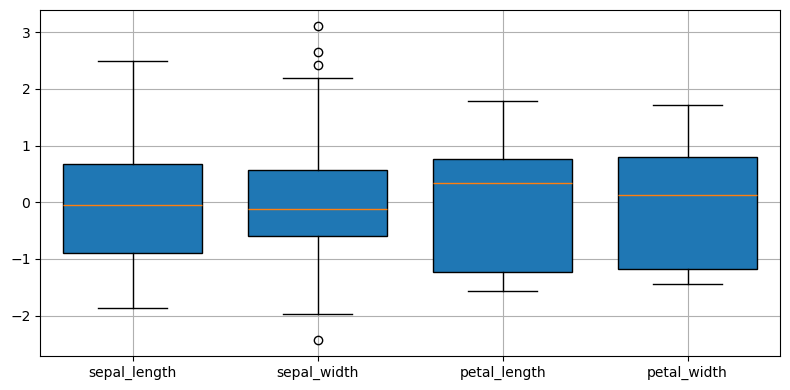

In [16]:
# results minmax with boxplot
boxplot(standard)

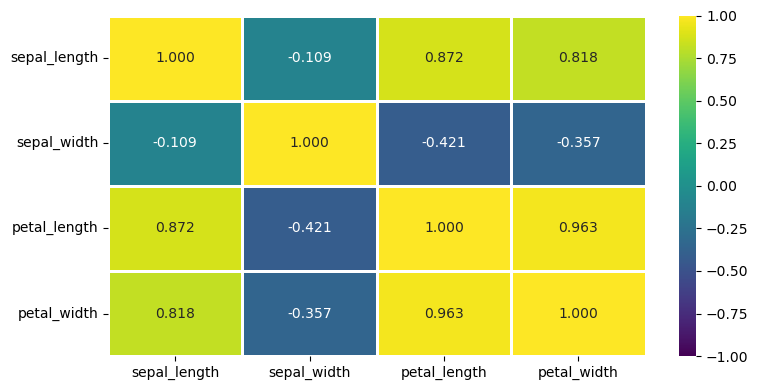

In [17]:
# results minmax with heatmap
heatmap(standard)

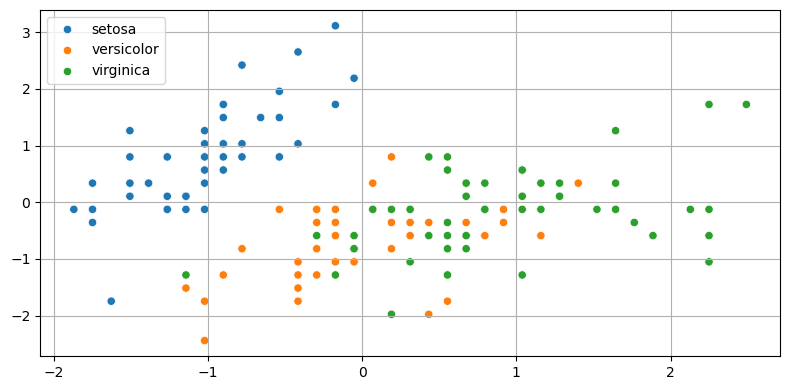

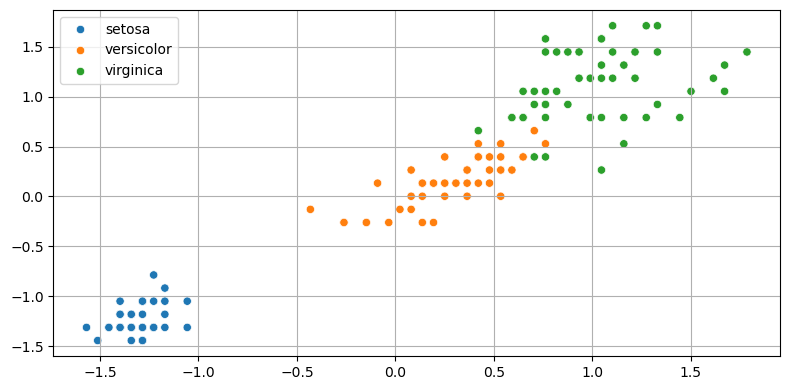

In [18]:
# results minmax with scatterplot
scatter(standard, "sepal_length", "sepal_width")
scatter(standard, "petal_length", "petal_width")

### RobustScaler